# Pandas Tutorial: Data analysis with Python

> https://www.dataquest.io/blog/pandas-python-tutorial/

Python 在数据分析领域里是一门非常强大的语言，在数据分析方面有着出色的生态系统。**Pandas** 包就是其中之一，它的主要特点是导入和分析数据非常的容易，Pandas 类似 Numpy、Matplotlib，提供了单一且方便的方式来处理数据分析和形象化的工作。

本文中，我们使用 Pandas 来分析 [IGN](http://www.ign.com/) 上的游戏评论数据，IGN 是一个颇受欢迎的游戏评论网站。相关数据可以从[这里](https://www.kaggle.com/egrinstein/20-years-of-games)获取到。通过分析评论数据，我们将学到类似索引等 Pandas 关键的方面。

![](https://www.dataquest.io/blog/content/images/witcher.jpg) 

比如类似**巫师3（Witcher3）**这款游戏，在 PS4 上的评论会比 Xbox One 上更多吗？数据集能帮我们给出结果。

## 使用Pandas导入数据
首先，我们先查看数据。数据以逗号分隔符来存储，或者 csv　文件，每一行通过换行来分隔，每一列以逗号` , `来分隔，下面是 `ign.csv` 文件的前面几行：

```
,score_phrase,title,url,platform,score,genre,editors_choice,release_year,release_month,release_day
0,Amazing,LittleBigPlanet PS Vita,/games/littlebigplanet-vita/vita-98907,PlayStation Vita,9.0,Platformer,Y,2012,9,12
1,Amazing,LittleBigPlanet PS Vita -- Marvel Super Hero Edition,/games/littlebigplanet-ps-vita-marvel-super-hero-edition/vita-20027059,PlayStation Vita,9.0,Platformer,Y,2012,9,12
2,Great,Splice: Tree of Life,/games/splice/ipad-141070,iPad,8.5,Puzzle,N,2012,9,12
3,Great,NHL 13,/games/nhl-13/xbox-360-128182,Xbox 360,8.5,Sports,N,2012,9,11
```

正如我们看到的，每一行代表游戏的一个 IGN 评论。每一列的含义如下：
- `score_phrase` IGN 评论的唯一值
- `title` 游戏名称
- `url` 通过 URL 可以看到详细评论
- `platform` 通过何种平台评论游戏（PC, PS4, etc）
- `score` 评分，从 1.0 ～ 10.0
- `genre` 游戏种类
- `editors_choice` 如果游戏并非通过选择打分的为 `N`，否则为 `Y`
- `release_year` 游戏发布年份
- `release_month` 游戏发布月份
- `release_day` 游戏发布日期

数据里还有一列包含索引值，到后面深入索引数据之前我们可以忽略这一列。我们通过 Pandas DataFrame 加载数据，DataFrame 是一种处理表格数据的方式，表格数据拥有行和列，类似上面的 csv 文件。

为了读取数据，我们使用 `pandas.read_csv` 函数。该函数能返回 csv 文件的 DataFrame：
- 导入 `pandas` 库，并习惯性的重命名为 `pd`，以便能以后能快速地调用它。
- 读取 `ign.csv` 文件到 DataFrame，并赋值给 `reviews`。

In [1]:
import pandas as pd
reviews = pd.read_csv("ign.csv")

获取完数据后，Pandas 提供了两个方法来快速打印数据：
- `pandas.DataFrame.head`：打印 DataFrame 的前 N 行，默认值为 5
- `pandas.DataFrame.tail`：打印 DataFrame 的后 N 行，默认值为 5

In [2]:
reviews.head()

,Unnamed: 0,score_phrase,title,url,platform,score,genre,editors_choice,release_year,release_month,release_day
0,0,Amazing,LittleBigPlanet PS Vita,/games/littlebigplanet-vita/vita-98907,PlayStation Vita,9.0,Platformer,Y,2012,9,12
1,1,Amazing,LittleBigPlanet PS Vita -- Marvel Super Hero E...,/games/littlebigplanet-ps-vita-marvel-super-he...,PlayStation Vita,9.0,Platformer,Y,2012,9,12
2,2,Great,Splice: Tree of Life,/games/splice/ipad-141070,iPad,8.5,Puzzle,N,2012,9,12
3,3,Great,NHL 13,/games/nhl-13/xbox-360-128182,Xbox 360,8.5,Sports,N,2012,9,11
4,4,Great,NHL 13,/games/nhl-13/ps3-128181,PlayStation 3,8.5,Sports,N,2012,9,11


In [3]:
reviews.tail(3)

,Unnamed: 0,score_phrase,title,url,platform,score,genre,editors_choice,release_year,release_month,release_day
18622,18622,Mediocre,Star Ocean: Integrity and Faithlessness,/games/star-ocean-5/ps4-20035681,PlayStation 4,5.8,RPG,N,2016,6,28
18623,18623,Masterpiece,Inside,/games/inside-playdead/xbox-one-121435,Xbox One,10.0,Adventure,Y,2016,6,28
18624,18624,Masterpiece,Inside,/games/inside-playdead/pc-20055740,PC,10.0,Adventure,Y,2016,6,28


我们还可以通过 `pandas.DataFrame.shape` 属性来查看行数和列数：

In [4]:
reviews.shape

(18625, 11)

通过结果可以看到，我们的数据有 18625 行，11 列。

Pandas 对比 Numpy 的一大优势就是 Pandas 允许我们可以有不同数据类型的列。`reviews` 有的类似 `store` 的 float 列；有的类似 `score_phrase` 的 string 列；有的类似 `release_year` 的 integer 列。

现在，让我们通过索引 `reviews` 来获取想要的行和列。

## 使用Pandas索引DataFrames
前面我们使用 `head` 方法来打印前 5 行数据，我们可以使用 `pandas.DataFrame.iloc` 来实现同样的功能。`iloc` 方法允许我们检索行和列的位置：

In [5]:
reviews.iloc[0:5, :]

,Unnamed: 0,score_phrase,title,url,platform,score,genre,editors_choice,release_year,release_month,release_day
0,0,Amazing,LittleBigPlanet PS Vita,/games/littlebigplanet-vita/vita-98907,PlayStation Vita,9.0,Platformer,Y,2012,9,12
1,1,Amazing,LittleBigPlanet PS Vita -- Marvel Super Hero E...,/games/littlebigplanet-ps-vita-marvel-super-he...,PlayStation Vita,9.0,Platformer,Y,2012,9,12
2,2,Great,Splice: Tree of Life,/games/splice/ipad-141070,iPad,8.5,Puzzle,N,2012,9,12
3,3,Great,NHL 13,/games/nhl-13/xbox-360-128182,Xbox 360,8.5,Sports,N,2012,9,11
4,4,Great,NHL 13,/games/nhl-13/ps3-128181,PlayStation 3,8.5,Sports,N,2012,9,11


正如我们所看到的，指定了想要的行数 `0:5`，意思是位置从 `0` 行开始的 `5` 行，即 *0, 1, 2, 3, 4*。这种情况下，也可以简写为 `:5`。

我们使用 `:` 来指定列的位置，表示获取所有列。

下面是一些索引（indexing）的例子：
- `reviews.iloc[:5, :]`：前5行、所有列
- `reviews.iloc[:, :]`：所有数据
- `reviews.iloc[5:, 5:]`：第5行和第5列之后的数据
- `reviews.iloc[:, 0]`：所有行的第一列数据
- `reviews.iloc[9, :]`：第10行数据

通过位置来索引与 Numpy 索引很相似。

现在，让我们移除没什么意义的第一列：

In [6]:
reviews = reviews.iloc[:, 1:]
reviews.head()

,score_phrase,title,url,platform,score,genre,editors_choice,release_year,release_month,release_day
0,Amazing,LittleBigPlanet PS Vita,/games/littlebigplanet-vita/vita-98907,PlayStation Vita,9.0,Platformer,Y,2012,9,12
1,Amazing,LittleBigPlanet PS Vita -- Marvel Super Hero E...,/games/littlebigplanet-ps-vita-marvel-super-he...,PlayStation Vita,9.0,Platformer,Y,2012,9,12
2,Great,Splice: Tree of Life,/games/splice/ipad-141070,iPad,8.5,Puzzle,N,2012,9,12
3,Great,NHL 13,/games/nhl-13/xbox-360-128182,Xbox 360,8.5,Sports,N,2012,9,11
4,Great,NHL 13,/games/nhl-13/ps3-128181,PlayStation 3,8.5,Sports,N,2012,9,11


## 在Pandas中使用标签来检索
我们已经知道如何通过行和列的位置来检索数据，现在我们通过 DataFrame 的其他主要的方法来检索数据，就是通过航和咧的标签来检索。

Pandas 优于 Numpy 的其中一点是 Pandas 的行和列都有标签，通过列的位置当然可以检索，但是这很难跟踪哪些数字对应哪些列。我们通过 `pandas.DataFrame.loc` 方法来使用标签，允许我们通过标签替代位置来检索数据。

我们使用 `loc` 浏览前五行数据：

In [7]:
reviews.loc[0:5, :]

,score_phrase,title,url,platform,score,genre,editors_choice,release_year,release_month,release_day
0,Amazing,LittleBigPlanet PS Vita,/games/littlebigplanet-vita/vita-98907,PlayStation Vita,9.0,Platformer,Y,2012,9,12
1,Amazing,LittleBigPlanet PS Vita -- Marvel Super Hero E...,/games/littlebigplanet-ps-vita-marvel-super-he...,PlayStation Vita,9.0,Platformer,Y,2012,9,12
2,Great,Splice: Tree of Life,/games/splice/ipad-141070,iPad,8.5,Puzzle,N,2012,9,12
3,Great,NHL 13,/games/nhl-13/xbox-360-128182,Xbox 360,8.5,Sports,N,2012,9,11
4,Great,NHL 13,/games/nhl-13/ps3-128181,PlayStation 3,8.5,Sports,N,2012,9,11
5,Good,Total War Battles: Shogun,/games/total-war-battles-shogun/mac-142565,Macintosh,7.0,Strategy,N,2012,9,11


这个例子与 `reviews.iloc[0:5, :]` 看起来没有什么区别，是因为我们的行标签匹配了位置值。我们可以看到行标签在表格的左边，也可以看出来它们通过 DataFrame 索引属性访问。我们展示数据的行索引：

In [8]:
reviews.index

RangeIndex(start=0, stop=18625, step=1)

索引并不一定与位置匹配，比如下面的代码：
- 获取数据的 `10` ~ `20` 行，并赋值为 `some_reviews`
- 浏览 `some_reviews` 的前 `5` 行

In [9]:
some_reviews = reviews.iloc[10:20, :]
some_reviews.head()

,score_phrase,title,url,platform,score,genre,editors_choice,release_year,release_month,release_day
10,Good,Tekken Tag Tournament 2,/games/tekken-tag-tournament-2/ps3-124584,PlayStation 3,7.5,Fighting,N,2012,9,11
11,Good,Tekken Tag Tournament 2,/games/tekken-tag-tournament-2/xbox-360-124581,Xbox 360,7.5,Fighting,N,2012,9,11
12,Good,Wild Blood,/games/wild-blood/iphone-139363,iPhone,7.0,NaN,N,2012,9,10
13,Amazing,Mark of the Ninja,/games/mark-of-the-ninja-135615/xbox-360-129276,Xbox 360,9.0,"Action, Adventure",Y,2012,9,7
14,Amazing,Mark of the Ninja,/games/mark-of-the-ninja-135615/pc-143761,PC,9.0,"Action, Adventure",Y,2012,9,7


可以看见，在 `some_reviews` 中，行索引从 10 到 20，因此，`loc` 标签检索的数字必须是从 10 到 20。

正如前面提到的，列标签可以很容易的找到数据，我们使用 `loc` 方法通过列标签替代位置索引检索数据：

In [12]:
reviews.loc[:5, 'score']

0    9.0
1    9.0
2    8.5
3    8.5
4    8.5
5    7.0
Name: score, dtype: float64

我们也可以一次通过列表形式指定多个列标签：

In [13]:
reviews.loc[:5, ['socre', 'release_year']]

,socre,release_year
0,NaN,2012
1,NaN,2012
2,NaN,2012
3,NaN,2012
4,NaN,2012
5,NaN,2012


## Pandas系列对象

在 Pandas 中我们获取指定列的数据有多种方式：
- `reviews.iloc[:, 1]`：获取第二列的数据
- `reviews.loc[:, "score_phrase"]`：获取指定标签列的数据
- `reviews["score_phrase"]`：只需要指定列名

In [14]:
reviews["score"]
reviews[["score","release_year"]]
type(reviews["score"])

pandas.core.series.Series

为了更好地理解它是如何工作的，我们先来创建一个序列（Series）：

In [15]:
s1 = pd.Series([1, 2])
s1

0    1
1    2
dtype: int64

这个序列可以包含任何类型的数据，或者混合类型。下面我们创建一个 string 类型的数据：

In [16]:
s2 = pd.Series(["Boris Yeltsin", "Mikhail Gorbachev"])
s2

0        Boris Yeltsin
1    Mikhail Gorbachev
dtype: object

## 在Pandas中创建DataFrame

我们可以通过多样的 Series 来创建 DataFrame。这里，我们通过上面两个序列创建：

In [17]:
pd.DataFrame([s1, s2])

,0,1
0,1,2
1,Boris Yeltsin,Mikhail Gorbachev


我们通过多重列表也可以达到同样的效果：

In [18]:
pd.DataFrame([
    [1, 2],
    ["Boris Yeltsin", "Mikhail Gorbachev"]
])

,0,1
0,1,2
1,Boris Yeltsin,Mikhail Gorbachev


也可以设置标签：

In [19]:
frame = pd.DataFrame(
    [
        [1, 2],
        ["Boris Yeltsin", "Mikhail Gorbachev"]
    ],
    index=["row1","row2"],
    columns=["column1","column2"]
)

frame

,column1,column2
row1,1,2
row2,Boris Yeltsin,Mikhail Gorbachev


这样我们就可以通过标签来检索数据了：

In [20]:
frame.loc["row1":"row2","column1"]

row1                1
row2    Boris Yeltsin
Name: column1, dtype: object

我们跳过 `column` 关键字，直接指定列名：

In [21]:
frame = pd.DataFrame(
    {
        "column1": [1, "Boris Yeltsin"],
        "column2": [2, "Mikhail Gorbachev"]
    }
)

frame

,column1,column2
0,1,2
1,Boris Yeltsin,Mikhail Gorbachev


## Pandas DataFrame方法
我们前面提到，DataFrame中每一列都是一个 Series 对象：

In [22]:
type(reviews["title"])

pandas.core.series.Series

使用 `head` 调用前面几条记录：

In [28]:
reviews["title"].head()

0                              LittleBigPlanet PS Vita
1    LittleBigPlanet PS Vita -- Marvel Super Hero E...
2                                 Splice: Tree of Life
3                                               NHL 13
4                                               NHL 13
Name: title, dtype: object

Pandas Series 和 DataFrames 都有其他的方法使计算简单化。例如，我们使用 `pandas.Series.mean` 方法计算**均值**:

In [45]:
reviews["score"].mean()

6.950459060402685

In [46]:
reviews.mean()

score               6.950459
release_year     2006.515329
release_month       7.138470
release_day        15.603866
dtype: float64

修改 `axis` 关键字参数求每一行每一列的 `mean` 值。`axis` 默认为 `0`，并像上面的例子那样，计算每一列的方差 `mean`。我们也可以设置为 `1` 来计算每一行的方差。注意，那样的话将只计算每行数值的方差：

In [49]:
reviews.mean(axis=1).head()

0    510.500
1    510.500
2    510.375
3    510.125
4    510.125
dtype: float64

这里有一些 Series 和 DataFrames 的方法：
- `pandas.DataFrame.corr`：找出 DataFrame 所有列之间的相关系数
- `pandas.DataFrame.count`：统计 DataFrame 每一列非空值的个数
- `pandas.DataFrame.max`：找出每一列的最大值
- `pandas.DataFrame.min`：找出每一列的最小值
- `pandas.DataFrame.median`：找出每一列的中位数
- `pandas.DataFrame.std`：找出每一列的标准误差

我们通过 `corr` 方法来看一下每一列 `score` 的相关系数。例如，这能告诉我们是最近发布游戏评价更高（release_year），还是年度发布游戏得分更高（release_month）。

In [54]:
reviews.corr()

,score,release_year,release_month,release_day
score,1.000000,0.062716,0.007632,0.020079
release_year,0.062716,1.000000,-0.115515,0.016867
release_month,0.007632,-0.115515,1.000000,-0.067964
release_day,0.020079,0.016867,-0.067964,1.000000


可以看到，我们的数值列与 `score` 的相关系数，意味着发布时间与评分并非线性相关的。

## Pandas中的DataFrame Math
我们可以在　Series 和 DataFrame　执行数学操作。例如，将每一个 `score` 值除以 `2`，将原来 0~10 的缩小成 0~5：

In [61]:
reviews["score"].head()/2

0    4.50
1    4.50
2    4.25
3    4.25
4    4.25
Name: score, dtype: float64

## Pandas中的Boolean Indexing
如前所述，`reviews` 数据集中 `score` 列的均值为 7。我们想要获取平均分以上的数据该怎么办呢？可以先做比较，生成布尔值标志比较的结果。例如查看 `score` 是否大于 7：

In [64]:
score_filter = reviews["score"] > 7
score_filter.head(10)

0     True
1     True
2     True
3     True
4     True
5    False
6    False
7     True
8    False
9    False
Name: score, dtype: bool

In [66]:
reviews["score"].head(10)

0    9.0
1    9.0
2    8.5
3    8.5
4    8.5
5    7.0
6    3.0
7    9.0
8    3.0
9    7.0
Name: score, dtype: float64

一旦有了比较值，就能选择 DataFrame 中比较值为 `True` 的行：

In [70]:
filtered_reviews = reviews[score_filter]
filtered_reviews.head(10)

,score_phrase,title,url,platform,score,genre,editors_choice,release_year,release_month,release_day
0,Amazing,LittleBigPlanet PS Vita,/games/littlebigplanet-vita/vita-98907,PlayStation Vita,9.0,Platformer,Y,2012,9,12
1,Amazing,LittleBigPlanet PS Vita -- Marvel Super Hero E...,/games/littlebigplanet-ps-vita-marvel-super-he...,PlayStation Vita,9.0,Platformer,Y,2012,9,12
2,Great,Splice: Tree of Life,/games/splice/ipad-141070,iPad,8.5,Puzzle,N,2012,9,12
3,Great,NHL 13,/games/nhl-13/xbox-360-128182,Xbox 360,8.5,Sports,N,2012,9,11
4,Great,NHL 13,/games/nhl-13/ps3-128181,PlayStation 3,8.5,Sports,N,2012,9,11
7,Amazing,Guild Wars 2,/games/guild-wars-2/pc-896298,PC,9.0,RPG,Y,2012,9,11
10,Good,Tekken Tag Tournament 2,/games/tekken-tag-tournament-2/ps3-124584,PlayStation 3,7.5,Fighting,N,2012,9,11
11,Good,Tekken Tag Tournament 2,/games/tekken-tag-tournament-2/xbox-360-124581,Xbox 360,7.5,Fighting,N,2012,9,11
13,Amazing,Mark of the Ninja,/games/mark-of-the-ninja-135615/xbox-360-129276,Xbox 360,9.0,"Action, Adventure",Y,2012,9,7
14,Amazing,Mark of the Ninja,/games/mark-of-the-ninja-135615/pc-143761,PC,9.0,"Action, Adventure",Y,2012,9,7


我们也可使用多个条件来过滤，比如我们想找出在 `Xbox One` 平台上评分大于 7 分的数据，可以这样做：
- 检查 `score` 是否大于 7
- 检查 `platform` 平台是否为 `Xbox One`   

In [75]:
xbox_one_filter = (reviews["score"] > 7) & (reviews["platform"] == "Xbox One")
filtered_reviews2 = reviews[xbox_one_filter]
filtered_reviews2.head()

,score_phrase,title,url,platform,score,genre,editors_choice,release_year,release_month,release_day
17137,Amazing,Gone Home,/games/gone-home/xbox-one-20014361,Xbox One,9.5,Simulation,Y,2013,8,15
17197,Amazing,Rayman Legends,/games/rayman-legends/xbox-one-20008449,Xbox One,9.5,Platformer,Y,2013,8,26
17295,Amazing,LEGO Marvel Super Heroes,/games/lego-marvel-super-heroes/xbox-one-20000826,Xbox One,9.0,Action,Y,2013,10,22
17313,Great,Dead Rising 3,/games/dead-rising-3/xbox-one-124306,Xbox One,8.3,Action,N,2013,11,18
17317,Great,Killer Instinct,/games/killer-instinct-2013/xbox-one-20000538,Xbox One,8.4,Fighting,N,2013,11,18


## Pandas Plotting
现在，我们知道怎么过滤数据了。我们还可以创建 plots 来观察 `Xbox One` 与 `PlayStation 4` 的分布对比情况，这将有助于我们了解哪款终端更适合游戏。我们使用柱状图（histogram）来展示不同的分数范围，能告诉我们哪款终端有更高的评价。

`pandas.DataFrame.plot` 方法默认绘制线性图形，我们得通过 `kind="hist"`关键之来绘制柱状图。

通过以下几个步骤：
- 调用 `%matplotlib inline` 在 Jupyter Notebook 中建立图形
- 过滤数据，只保留 `Xbox One` 数据
- 绘制 `score` 列

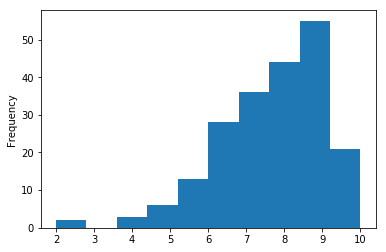

In [84]:
%matplotlib inline
reviews[reviews["platform"] == "Xbox One"]["score"].plot(kind="hist")

类似的，我们可以绘制针对 `PS4` 的图形：

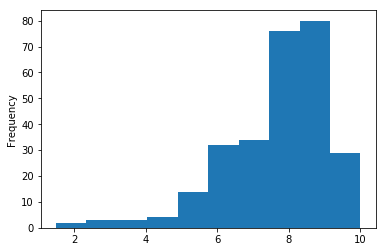

In [89]:
reviews[reviews["platform"] == "PlayStation 4"]["score"].plot(kind="hist")

可以看到 `PlayStation 4` 比 `Xbox One` 有更高的评分。

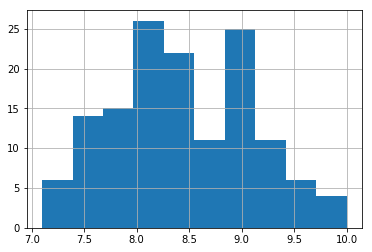

In [91]:
filtered_reviews2["score"].hist()